#### 绘图入门
https://matplotlib.org/

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pd.options.display.max_rows = 10
anscombe = sns.load_dataset("anscombe")

In [7]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
anscombe.groupby('dataset').std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [8]:
anscombe['dataset'].value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

In [11]:
# 提取dataset I
ds_1 = anscombe[anscombe['dataset'] == 'I']

In [12]:
ds_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
...,...,...,...
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


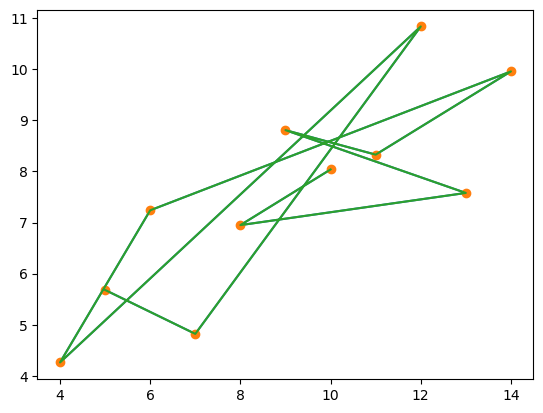

In [15]:
# plot ds_1
plt.plot(ds_1['x'], ds_1['y'])
plt.show()

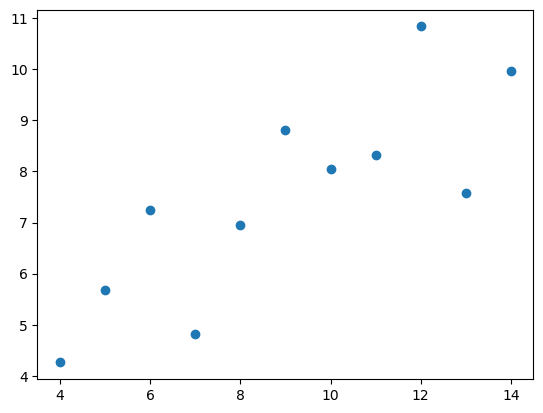

In [16]:
# 画点
plt.plot(ds_1['x'], ds_1['y'], 'o')
plt.show()

In [17]:
ds_2 = anscombe[anscombe['dataset'] == 'II']
ds_3 = anscombe[anscombe['dataset'] == 'III']
ds_4 = anscombe[anscombe['dataset'] == 'IV']

##### 创建子图

In [20]:
# 创建一个figure对象作为画布
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

In [21]:
# 子图有两行两列，axes1的位置是1
axes1 = fig.add_subplot(2, 2, 1)

In [22]:
# 分别给出axes2,axes3,axes4的位置
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

In [23]:
# 分别在4个子图上绘图
axes1.plot(ds_1['x'], ds_1['y'], 'o')
axes2.plot(ds_2['x'], ds_2['y'], 'o')
axes3.plot(ds_3['x'], ds_3['y'], 'o')
axes4.plot(ds_4['x'], ds_4['y'], 'o')

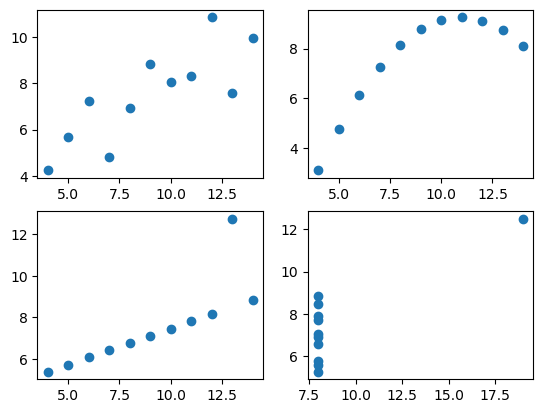

In [24]:
fig

In [25]:
# 向各幅子图添加小标题
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

Text(0.5, 1.0, 'dataset_4')

In [26]:
# 向整幅图添加一个大标题
fig.suptitle("Anscombe Data")

Text(0.5, 0.98, 'Anscombe Data')

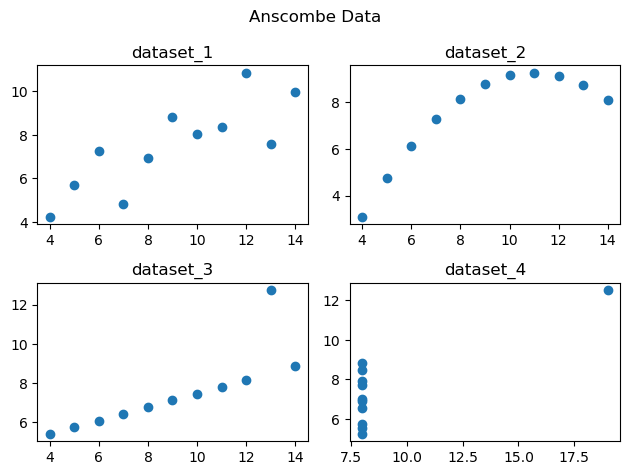

In [29]:
# 使用紧凑布局
fig.tight_layout()
fig

See more on [Parts of a Figure](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

#### 使用matplotlib绘图

In [33]:
tips = sns.load_dataset("tips")

In [34]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### 直方图

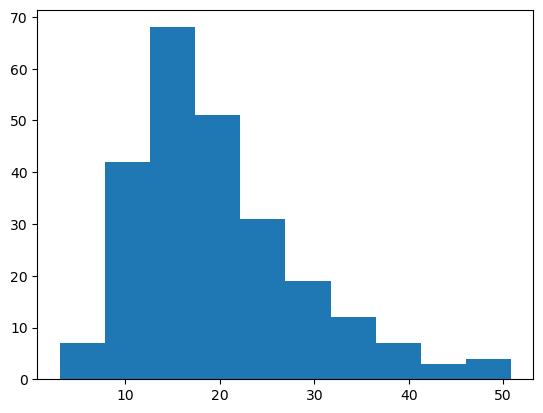

In [36]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)
plt.show()

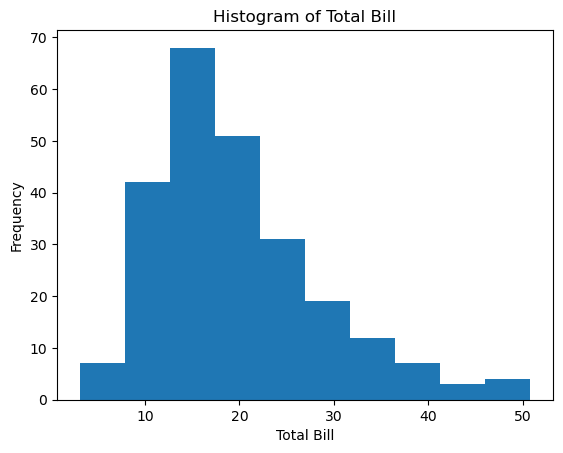

In [37]:
axes1.set_title('Histogram of Total Bill')
axes1.set_ylabel('Frequency')
axes1.set_xlabel('Total Bill')
fig

##### 散点图

In [38]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip']) #scatter plot需要两个变量

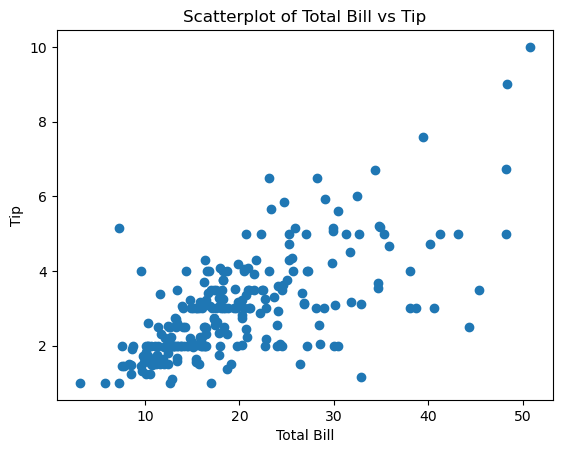

In [39]:
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot

##### 箱线图

/tmp/ipykernel_29670/4280835529.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot(


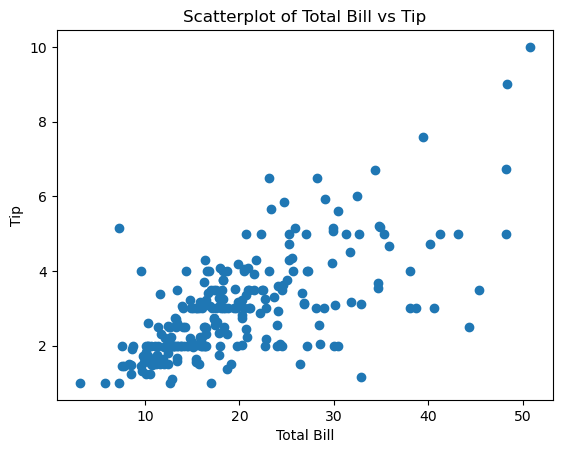

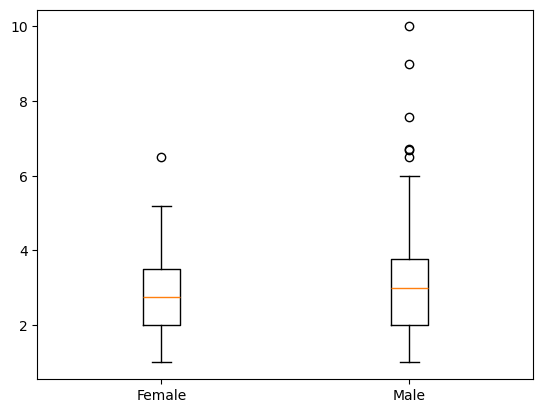

In [40]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # first argument of boxplot is the data
    # since we are plotting multiple pieces of data
    # we have to put each piece of data into a list
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']],
    # we can then pass in an optional labels parameter
    # to label the data we passed
    labels=['Female', 'Male'])
plt.show()

##### 图中中线为中位数，箱线上下为25%(Q1)和75%(Q3)分位数
##### 下横线是Q1 - 1.5*(Q3-Q1)，上横线Q3 + 1.5*(Q3-Q1)

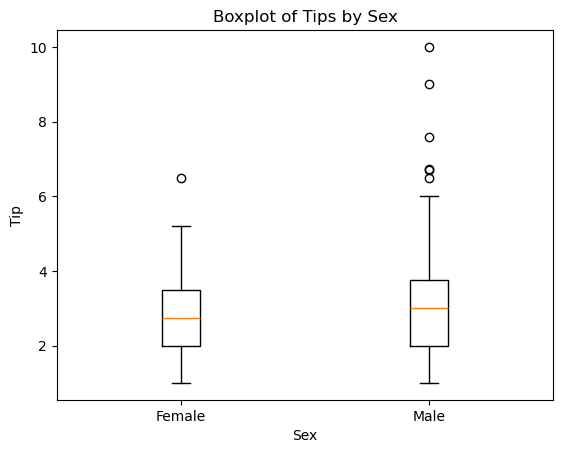

In [41]:
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
boxplot

##### 多个变量关系

In [42]:
def recode_sex(sex):
    if sex == 'Female':
       return 0
    else:
       return 1

In [43]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


Text(0, 0.5, 'Tip')

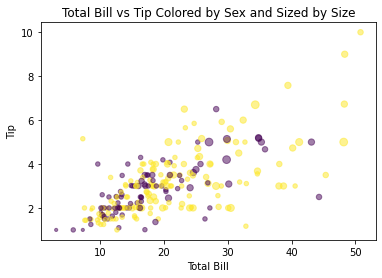

In [29]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    # set the size of the dots based on party size
    # we multiply the values by 10 to make the points bigger
    # and to emphasize the differences
    s=tips['size'] * 10,
    # set the color for the sex
    c=tips['sex_color'],
    # set the alpha value so points are more transparent
    # this helps with overlapping points
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### 使用seaborn画图
https://seaborn.pydata.org/

##### 直方图

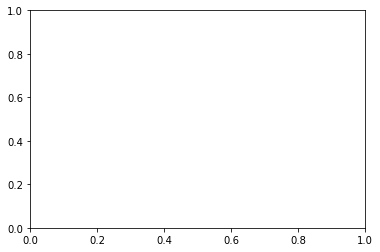

In [30]:
hist, ax = plt.subplots()   #与plt.figure和add_subplot等价

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

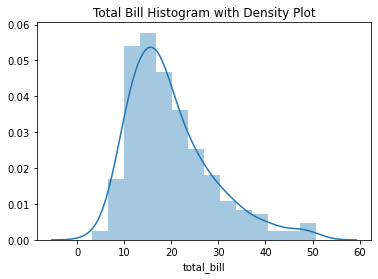

In [31]:
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0, 0.5, 'Frequency')

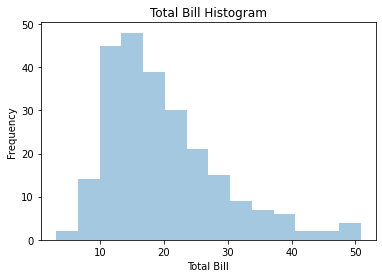

In [32]:
hist, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)  #去掉核密度估计
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

##### 核密度估计

Text(0, 0.5, 'Unit Probability')

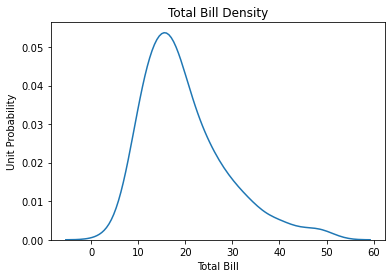

In [33]:
den, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)  #去掉直方图
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

##### 频数图

Text(0.5, 0, 'Total Bill')

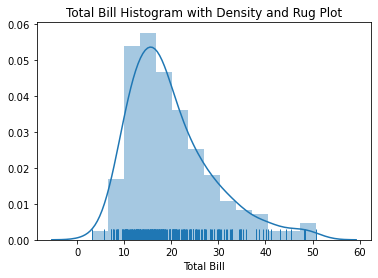

In [34]:
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

##### 计数图(条形图)

Text(0, 0.5, 'Frequency')

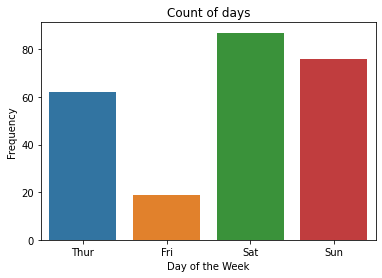

In [35]:
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

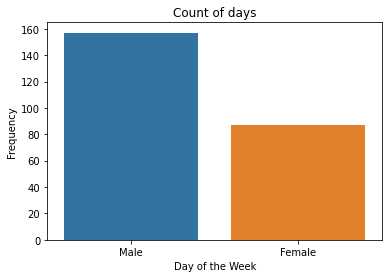

In [59]:
count, ax = plt.subplots()
ax = sns.countplot(tips['sex'])
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

##### 散点图

Text(0, 0.5, 'Tip')

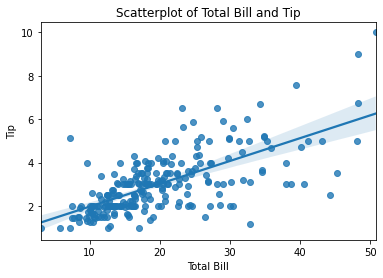

In [36]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

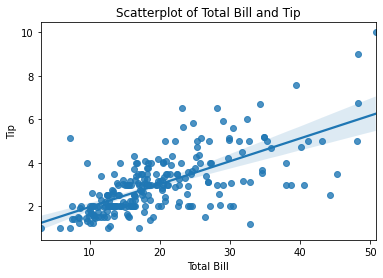

In [60]:
scatter, ax = plt.subplots()
ax = sns.regplot(x=tips['total_bill'], y=tips['tip'])
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

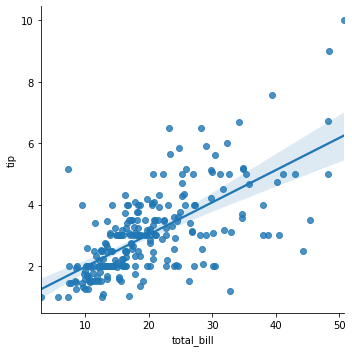

In [37]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)  #lmplot创建figure，而regplot创建一个axes

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

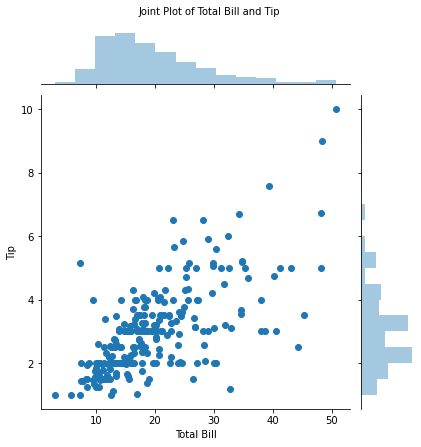

In [38]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)  #jointplot同样创建一个figure
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip',fontsize=10, y=1.03)

In [39]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [40]:
type(joint)

seaborn.axisgrid.JointGrid

In [41]:
type(fig)

seaborn.axisgrid.FacetGrid

##### 蜂巢图

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

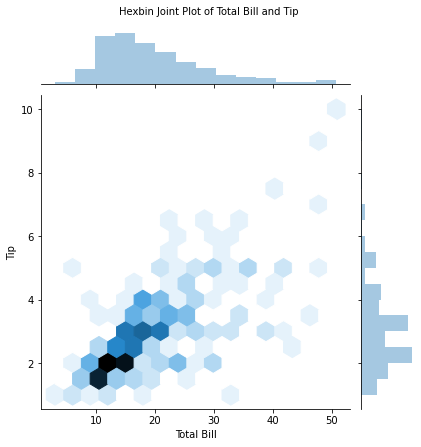

In [42]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

##### 2维密度图

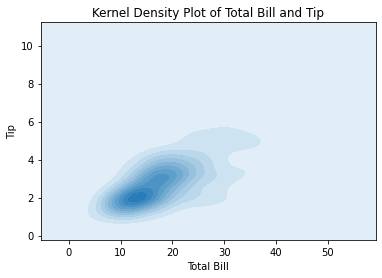

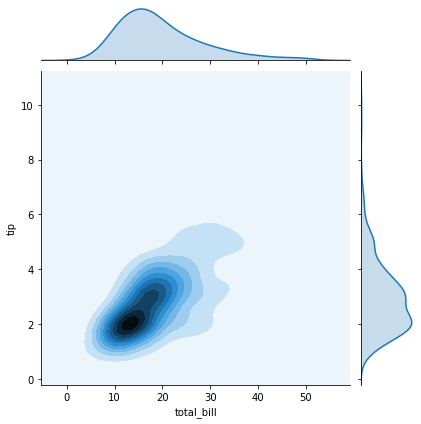

In [43]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

##### 条形图

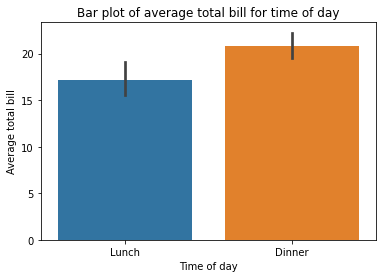

In [44]:
bar, ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)  #默认计算total_bill的均值
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')
plt.show()

##### 箱线图

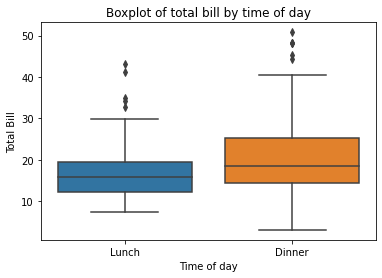

In [45]:
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

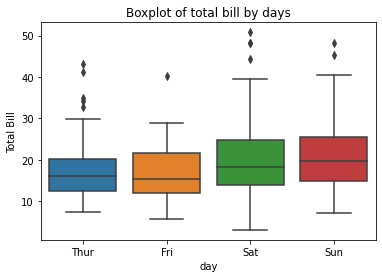

In [46]:
box, ax = plt.subplots()
ax = sns.boxplot(x='day', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by days')
ax.set_xlabel('day')
ax.set_ylabel('Total Bill')
plt.show()

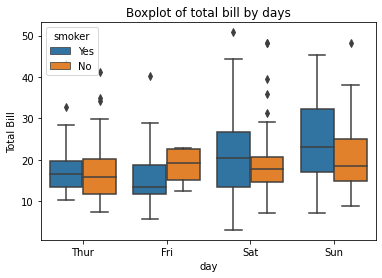

In [47]:
box, ax = plt.subplots()
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)
ax.set_title('Boxplot of total bill by days')
ax.set_xlabel('day')
ax.set_ylabel('Total Bill')
plt.show()

##### 小提琴图

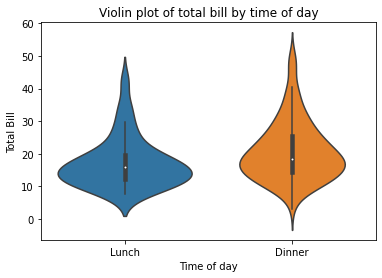

In [48]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

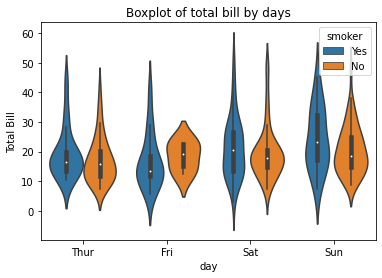

In [49]:
box, ax = plt.subplots()
ax = sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips)
ax.set_title('Boxplot of total bill by days')
ax.set_xlabel('day')
ax.set_ylabel('Total Bill')
plt.show()

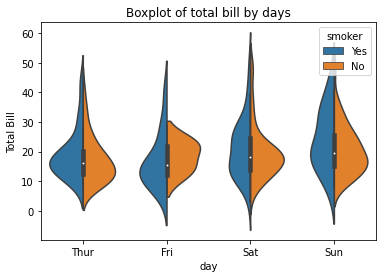

In [50]:
box, ax = plt.subplots()
ax = sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, split=True)
ax.set_title('Boxplot of total bill by days')
ax.set_xlabel('day')
ax.set_ylabel('Total Bill')
plt.show()

##### 成对关系

In [51]:
tips_numeric = tips.iloc[:,0:-1] #去掉最后一列
tips_numeric

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


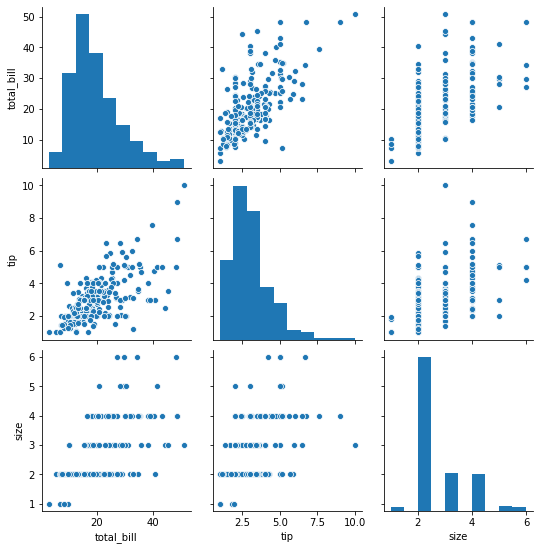

In [52]:
sns.pairplot(tips_numeric)    #total_bill,tip,size之间的关系

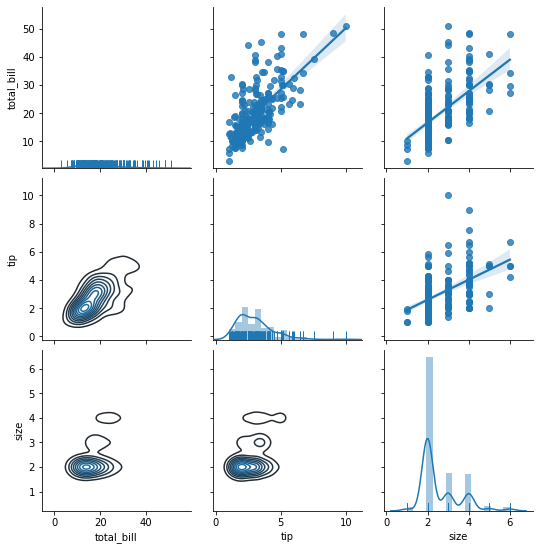

In [53]:
pair_grid = sns.PairGrid(tips_numeric)

# we can use plt.scatter instead of sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

##### 多变量数据

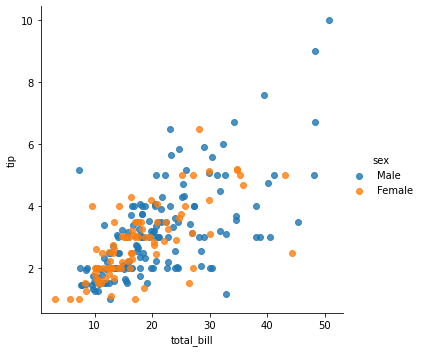

In [54]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,hue='sex', fit_reg=False)
plt.show()  #使用hue参数得到total_bill, tip 和sex之间的关系

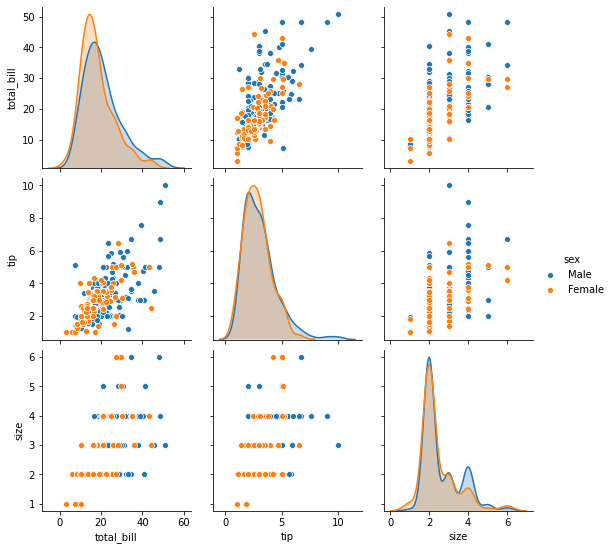

In [55]:
fig = sns.pairplot(tips_numeric, hue='sex')

##### 分面(facet)

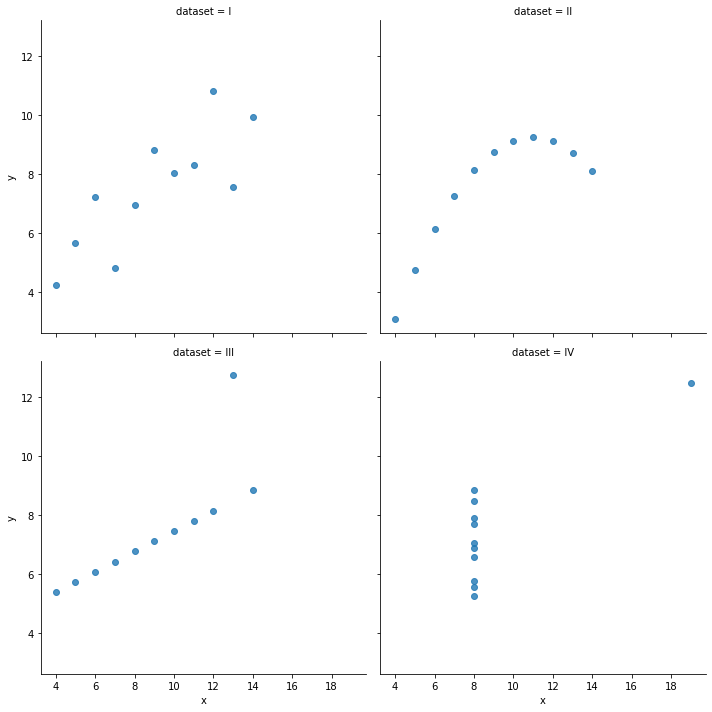

In [67]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe,
                           fit_reg=False,
                           col='dataset', col_wrap=2)  #col是column的意思，指定facet变量，col_wrap表示有两行

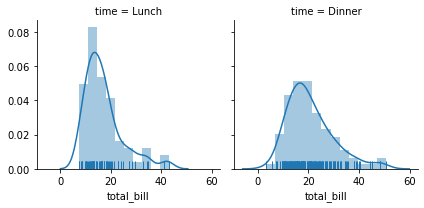

In [68]:
# create the FacetGrid for axes level facet
facet = sns.FacetGrid(tips, col='time')

# for each value in time, plot a histogram of total bill
facet.map(sns.distplot, 'total_bill', rug=True)
plt.show()

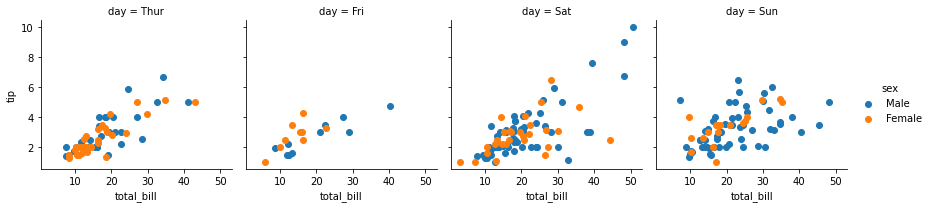

In [69]:
facet = sns.FacetGrid(tips, col='day', hue='sex') #还可以加上hue参数
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()  #加上图例
plt.show()

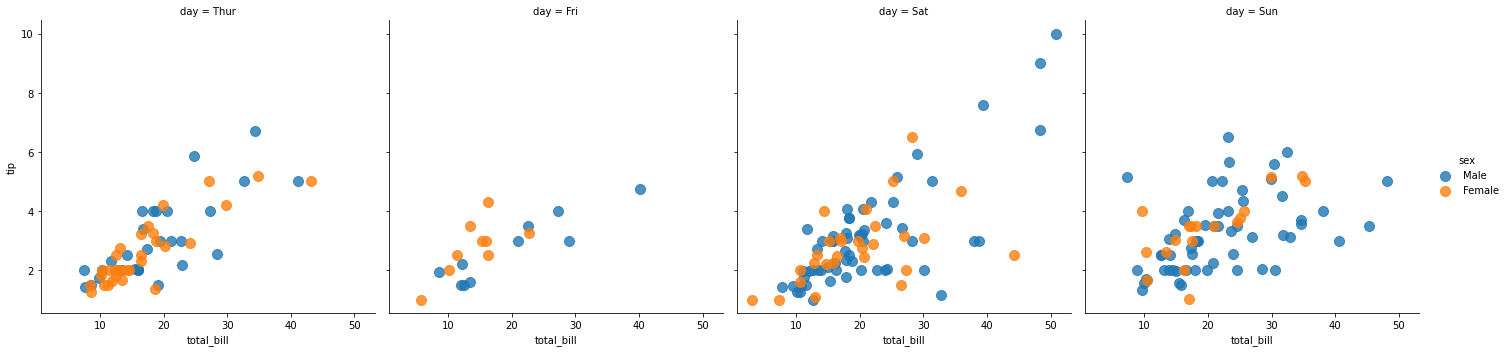

In [70]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', col='day',scatter_kws={'s': 100})

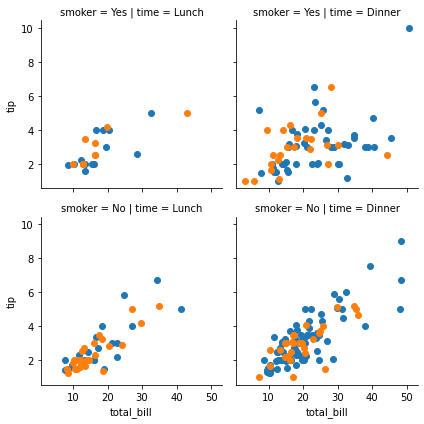

In [71]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') #行和列表示不同的变量
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

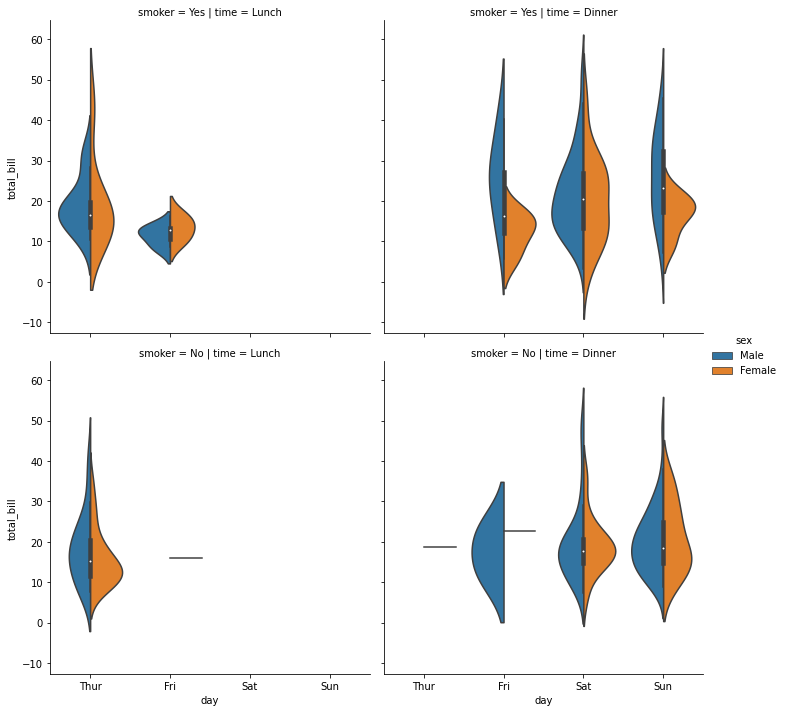

In [72]:
facet = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, row='smoker', col='time', kind='violin', split=True)

#### 使用pandas进行绘图

##### 直方图

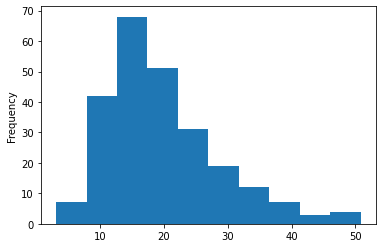

In [73]:
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()
plt.show()

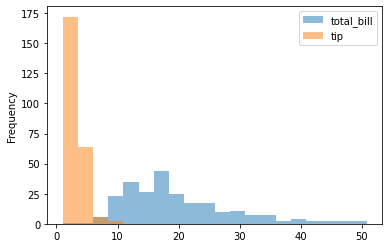

In [74]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)
plt.show()

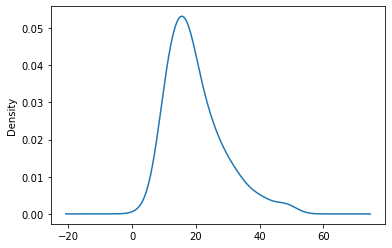

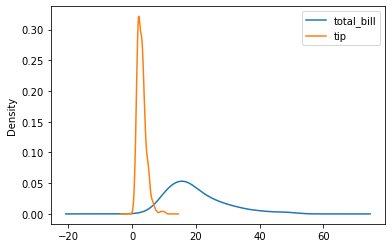

In [75]:
# on a series
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.kde()
plt.show()

# on a dataframe
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.kde(ax=ax)
plt.show()

##### 散点图

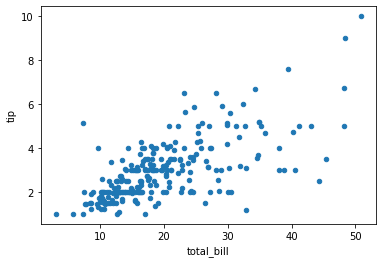

In [76]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)
plt.show()

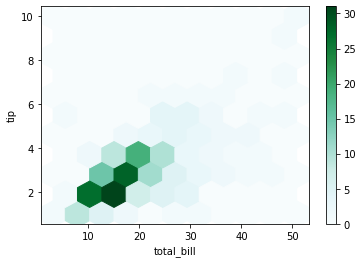

In [77]:
#蜂巢图
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)
plt.show()

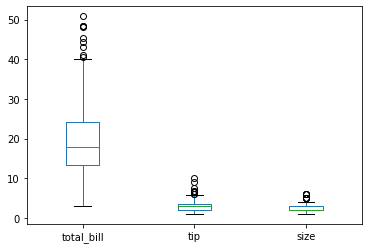

In [78]:
#箱线图
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)
plt.show()

#### seaborn主题和样式

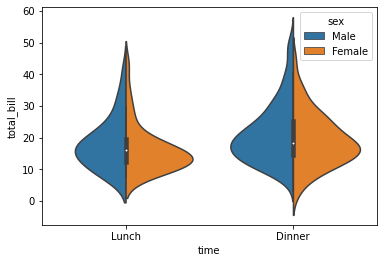

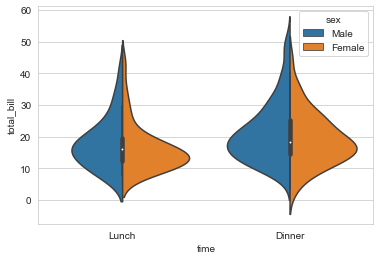

In [79]:
# initial plot for comparison
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show()

# set style and plot
sns.set_style('whitegrid')  #writegrid样式
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show()

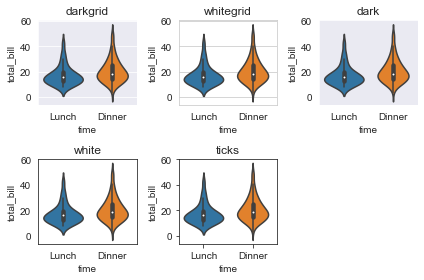

In [80]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1 
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)

fig.tight_layout()
plt.show()